<a id='verytop'></a>

# Lab 3: Applications of Bases - v2 - Updated 2/12/26 8:30pm MT

## Due Date: Thurs, Feb 19th 11:59 PM on Gradescope


### Detailed Submission Instructions Are Provided at the end of this Notebook


## Collaboration Policy

A key step in learning and retention is **creating solutions on your own.**   Below are examples of acceptable vs unacceptable use of resources and collaboration when doing lab assignments in CSCI 2820.


The following would be some **examples of cheating** when working on HW assignments in CSCI 2820.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given lab problem or one similar is cheating.  However, consulting notes from the class videos, and web pages that explain the material taught in class but do NOT show a solution to the lab problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course videos, the course textbooks, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the lab before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a lab problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a lab solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit office Hours and/or post questions on Piazza!



## Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.

### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1abc| 3 | autograded
Question 2a | 2 | manual
Question 2bcde | 12 | autograded
Question 2f | 3 | manual 
Question 3acdefghij | 27  | autograded
Question 3b | 3 | manual
|Total | 50


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


In [1]:


# import useful libraries
import numpy as np
import matplotlib.pyplot as plt


from skimage.color import ycbcr2rgb

# Function needed to run in-notebook tests
import hashlib

def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()


def get_array_hash_normalized(arr):
    """
    Hash numpy array ignoring dtype differences (values only),
    treating -0.0 as 0.0 and canonicalizing NaNs.
    """
    arr = np.ascontiguousarray(arr, dtype=np.float64)

    # View as unsigned integers so we can manipulate bits
    view = arr.view(np.uint64)

    # Mask for the exponent+mantissa (everything except the sign bit)
    mant_exp_mask = (1 << 63) - 1

    # For entries that are exactly zero (pos or neg), clear sign bit
    zero_mask = (view & mant_exp_mask) == 0
    view[zero_mask] = 0

    # Canonicalize NaNs: all NaNs get the same payload
    nan_mask = np.isnan(arr)
    if nan_mask.any():
        arr[nan_mask] = np.float64(np.nan)

    return hashlib.md5(arr.tobytes() + str(arr.shape).encode()).hexdigest()

## Matrix and Vector Operations in Numpy

**Recall: Vectors in NumPy:**

To create the vector
\begin{equation}
\mathbf{v} = \left[\begin{array}{r} 1  \\  2 \\ -3  \end{array}\right]
\end{equation}
in NumPy we can use the following syntax:

In [2]:
v=np.array([[1],[2],[-3]])
v

array([[ 1],
       [ 2],
       [-3]])

**Recall: Matrices in NumPy:**

To create the matrix $$
\begin{equation}
A = \left[\begin{array}{rrr} 1 & 1 & 0 \\ 1 & 0 & 2 \\ 3 & 1 & -1 \end{array}\right]
\end{equation}
$$ in NumPy we can use the following syntax:

In [3]:
A = np.array([[1,1,0],[1,0,2],[3,1,-1]])
A

array([[ 1,  1,  0],
       [ 1,  0,  2],
       [ 3,  1, -1]])

In [4]:
B = np.array([[2,3,4],[5,6,7],[8,9,10]])

**Selector Operators in NumPy Arrays**

In [5]:
# To grab the first row:
A[0]

array([1, 1, 0])

In [6]:
# To grab the first column as a column vector
A[:,[0]]

array([[1],
       [1],
       [3]])

In [7]:
# To grab the entry in the 1st column and 3rd row:
A[2,0]

np.int64(3)

**Matrix-Vector or Matrix-Matrix Multiplication in NumPy**

To multiply a matrix times a another matrix (or vector) in NumPy we can use the `@` operator:  

In [8]:
#To Multiply A and v 

A@v

array([[ 3],
       [-5],
       [ 8]])

In [9]:
# To multiply two matrices:
A@B

array([[ 7,  9, 11],
       [18, 21, 24],
       [ 3,  6,  9]])

**Matrix Inverses in NumPy**
To find the inverse an invertible matrix in NumPy we can use the `np.linalg.inv` method (https://numpy.org/doc/2.0/reference/generated/numpy.linalg.inv.html)


In [10]:
A_inv = np.linalg.inv(A)

A_inv

array([[-0.4,  0.2,  0.4],
       [ 1.4, -0.2, -0.4],
       [ 0.2,  0.4, -0.2]])

We can verify that this is in fact the inverse by ensuring that $A^{-1}A = I$  (note there may be some floating point rounding error)

In [11]:
# Run this cell - the output should be the Identity matrix:
A@A_inv

array([[ 1.00000000e+00,  2.77555756e-17,  5.55111512e-17],
       [-5.55111512e-17,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

**Determinants in NumPy**
To find the determinant of a square matrix in NumPy we can use the `np.linalg.det` method https://numpy.org/doc/2.0/reference/generated/numpy.linalg.det.html


In [12]:
np.linalg.det(B)

np.float64(0.0)

In [13]:
# You should get an error if you uncomment and run this cell, because we just saw above that the determinant of B is 0.
# np.linalg.inv(B)

**Transpose in NumPy**
To find the transpose of a matrix, use the `.T` attribute

In [14]:
A.T

array([[ 1,  1,  3],
       [ 1,  0,  1],
       [ 0,  2, -1]])

In [15]:
# To convert the first row to a column vector:
np.array([A[0]]).T

array([[1],
       [1],
       [0]])

# Image compression
Digital images, such as the photographs taken on your phone,
    are
    displayed as a rectangular array of pixels.  For example, the
    photograph shown here is 1440 pixels wide and
    1468 pixels high.  

<img src="img/orig.png" width="1440" height="1468">


If we were to zoom in on the photograph, we
    would be able to see individual pixels, such as those shown here:

<img src="img/both.png">

A lot of data is required to display this image.  A quantity
    of digital data is frequently measured in bytes,
    where one byte is the amount of storage needed to record an
    integer between 0 and 255.  As we will see shortly, each pixel
    requires three bytes to record that pixel's color.  This means the
    amount of data required to display this image is
    $3\times1440\times1468 = 6,341,760$ bytes or about 6.3
    megabytes.

Of course, we would like to store this image on a phone or
    computer and perhaps transmit it through our data plan to
    share it with others.  If possible, we would like to find a
    way to represent this image using a smaller amount of data
    so that we don't run out of memory on our phone and quickly
    exhaust our data plan.
        
As we will see in this lab, the JPEG compression
    algorithm provides a means for doing just that.  This image, when
    stored in the JPEG format, requires only 467,359 bytes of data,
    which is about 7% of the 6.3 megabytes required to display the
    image.  That is, when we display this image, we are reconstructing
    it from only 7% of the original data.  This isn't too surprising
    since there is quite a bit of redundancy in the image; the left
    half of the image is almost uniformly blue.  The JPEG algorithm
    detects this redundancy by representing the data using
    **bases** that are well-suited to the task.




# Color Models
A color is represented digitally by a vector in
    $\mathbb{R}^3$.  There are different ways in which we can
    represent colors, however, depending on whether a computer or a
    human will be processing the color.  

We will describe two of these
    representations, called color models, and demonstrate how
    they are used in the JPEG compression algorithm.

#### RGB Color Model:
        
Digital displays typically create colors by blending together
    various amounts of red, green, and blue.  We can therefore
    describe a color by putting its constituent amounts of red, green,
    and blue into a vector $\begin{bmatrix} R \\ G \\ B \end{bmatrix}$.  

The quantities
    $R$, $G$, and $B$ are each stored with one byte of
    information so they are integers between 0 and 255.  This
    is called the $RGB$ color model.

        
Run the cell below to create a function that takes the values of the RBG vector and outputs a rectangle with the corresponding color.  (The code in this function out of the scope of this course, but at a high level it utilizes matplotlib's `imshow` method, whic displays RBG data as an image (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

In [16]:

def show_rgb(rgb_input, title=None, size=2.5):
    """
    Display a rectangle for an RGB color.

    Parameters
    ----------
    rgb_input : array-like
        [[R], [G], [B]] or [R, G, B], with each ∈ [0,255].
    title : str or None
        Optional title for the plot.
    size : float
        Size scaling for the rectangle figure.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The created Matplotlib figure (caller should plt.show() and plt.close(fig)).
    """
    # Flatten input
    rgb_input = np.array(rgb_input, dtype=float).flatten()
    if rgb_input.shape[0] != 3:
        raise ValueError("Input must have three values: [R, G, B].")

    R, G, B = rgb_input

    # --- Range checks ---
    for name, val in zip(("R", "G", "B"), (R, G, B)):
        if not (0.0 <= val <= 255.0):
            raise ValueError(f"{name} out of range: {val} (expected 0–255)")

    # Normalize for Matplotlib
    rgb = rgb_input / 255.0
    patch = np.ones((40, 60, 3), dtype=float) * rgb

    # Plot
    fig, ax = plt.subplots(figsize=(size, size*0.75))
    ax.imshow(patch)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_frame_on(True)

    if title is None:
        title = f"RGB = [{int(R)}, {int(G)}, {int(B)}]"
    ax.set_title(title)

    return fig


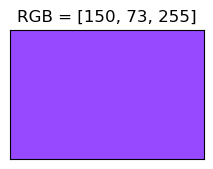

In [17]:
# Create a random rgb vector
rgb_vec = np.array([[150],[73],[255]])

# Visualize the color using the show_rgb function
fig = show_rgb(rgb_vec)


**Exercise 1**: Try putting in different vector inputs to the RGB function (where each entry is between $0$ and $255$) to see how different values of RGB change the color.  
 

a).  Explore what happens when $G=0, B=0$ and $R$ is allowed to vary

b).  Explore happens when $R=0, G=0$ and $B$ is allowed to vary




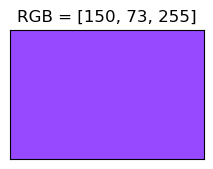

In [18]:
# Use this cell to play around with the rgb function:

# Create a random rgb vector
rgb_vec = np.array([[150],[73],[255]])

# Visualize the color using the show_rgb function
fig = show_rgb(rgb_vec)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


### 🔴 Question 1a (1 pt)

What vector represents pure green in the RGB color model? Give your answer as a numpy array in the format $\begin{bmatrix} R \\ G \\ B \end{bmatrix}$

	     


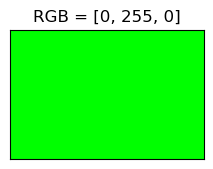

In [19]:
green =  np.array([[0],[255], [0]]) # SOLUTION


fig = show_rgb(green)

In [20]:
# TEST

assert get_array_hash_normalized(green) == 'ed6a6404a79d0a5c8e11a6413e5ce5a9'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


### 🔴 Question 1b (1 pt) 

What vector represents black in the RGB color model? Give your answer as a numpy array in the format $\begin{bmatrix} R \\ G \\ B \end{bmatrix}$

	     


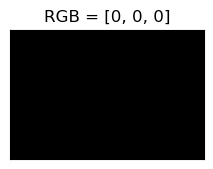

In [21]:
black =  np.array([[0],[0], [0]]) # SOLUTION


fig = show_rgb(black)

In [22]:
# TEST

assert get_array_hash_normalized(black) == '17acb292c7986f3e21d1d2de0a9e7670'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 1c (1 pt)

What vector represents pure white in the RGB color model?


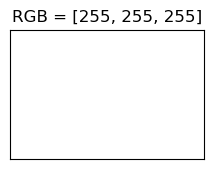

In [23]:
white =  np.array([[255],[255], [255]]) # SOLUTION

fig = show_rgb(white)

In [24]:
# TEST

assert get_array_hash_normalized(white) == 'c1571cca3cc013fb951fc490b61365e0'

In [25]:
# Run this cell to close the figures you ran above (so they don't take up too much memory)

plt.close(fig) 

#### $YC_bC_r$ Color Model
   

We can define a basis $\mathcal{B}=\{\mathbf v_1,\mathbf v_2,\mathbf v_3\}$
    where

$$\mathbf v_1 =\left[\begin{array}{c} 1 \\ 1 \\ 1 \end{array}\right],~~~
      \mathbf v_2 =\left[\begin{array}{c} 0 \\ -0.34413 \\ 1.77200
      \end{array}\right],~~~
      \mathbf v_3 =\left[\begin{array}{c} 1.40200 \\ -0.71414 \\
      0 \end{array}\right]
$$
that defines a new coordinate system with coordinates we denote
    $Y$, $C_b$, and $C_r$:

$$\left\{{\begin{bmatrix} R \\ G \\ B \end{bmatrix}}\right\}_{\mathcal{B}} = \begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}
$$




The coordinate $Y$ is called _luminance_ while
    $C_b$ and $C_r$ are called blue and red
    _chrominance_, respectively.  

In this coordinate system,
    luminance will vary from 0 to 255, while the chrominances vary
    between -127.5 and 127.5.  This is known as the $YC_bC_r$ color
    model.  


Run the code below to create a function that  display a rectangle for a $YC_bC_r$  vector (again this code is outside the scope of this course, but it utilizes `cv2` an open source computer vision library)



In [26]:


def show_ycbcr(ycbcr_input, title=None, size=2.5):
    """
    Display a rectangle for a YCbCr color using scikit-image (no cv2).

    Parameters
    ----------
    ycbcr_input : array-like
        [Y, Cb, Cr], with Y ∈ [0,255] and Cb,Cr ∈ [-127.5, 127.5] (centered chroma).
    title : str or None
        Optional plot title (defaults to input + converted RGB).
    size : float
        Figure size scale.

    Returns
    -------
    fig : matplotlib.figure.Figure
    """
    vec = np.array(ycbcr_input, dtype=float).flatten()
    if vec.size != 3:
        raise ValueError("Input must be [Y, Cb, Cr] with three values.")
    Y, Cb, Cr = vec

    # range checks
    if not (0.0 <= Y <= 255.0):
        raise ValueError(f"Y out of range: {Y} (expected 0–255)")
    if not (-127.5 <= Cb <= 127.5):
        raise ValueError(f"Cb out of range: {Cb} (expected -127.5–127.5)")
    if not (-127.5 <= Cr <= 127.5):
        raise ValueError(f"Cr out of range: {Cr} (expected -127.5–127.5)")

    # Map centered chroma to [0,255] and keep Y as-is (skimage expects YCbCr order)
    ycbcr_255 = np.array([Y, Cb + 128.0, Cr + 128.0], dtype=np.float32).reshape(1, 1, 3)

    # Convert to RGB in [0,1]
    rgb01 = np.clip(ycbcr2rgb(ycbcr_255)[0, 0], 0.0, 1.0)

    # Render a small patch
    patch = np.ones((40, 60, 3), dtype=float) * rgb01
    fig, ax = plt.subplots(figsize=(size, size * 0.75))
    ax.imshow(patch)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_frame_on(True)

    if title is None:
        R, G, B = (rgb01 * 255.0).round().astype(int)
        title = f"YCbCr = [{Y:.1f}, {Cb:.1f}, {Cr:.1f}]"
    ax.set_title(title)

    return fig

**Exercise 2**: Try putting in different vector inputs to the YCbCr function to see how different values change the color.  
 

a).  Explore what happens when $C_b=0, C_r=0$ and $Y$ is allowed to vary

b).  Explore happens when $Y=0, C_r=0$ and $C_b$ is allowed to increase between $0$ and $127.5$




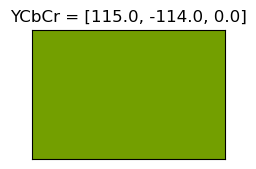

In [27]:
# Use this cell to play around with the YCbCr function:

# Create a random YCbCr vector (Y ∈ [0,255]  and Cb, Cr ∈ [-127.5, 127.5])
YCbCr_vec = np.array([[115],[-114],[0]])

# Visualize the color using the show_ycbcr function
fig = show_ycbcr(YCbCr_vec)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


### 🔴 Question 2a (2 pt) 

Recall from above:  $\mathcal{B}=\{\mathbf v_1,\mathbf v_2,\mathbf v_3\}$
    where

$$\mathbf v_1 =\left[\begin{array}{c} 1 \\ 1 \\ 1 \end{array}\right],~~~
      \mathbf v_2 =\left[\begin{array}{c} 0 \\ -0.34413 \\ 1.77200
      \end{array}\right],~~~
      \mathbf v_3 =\left[\begin{array}{c} 1.40200 \\ -0.71414 \\
      0 \end{array}\right]
$$

Verify that $\mathcal{B}$ is a basis.  

**Question 2a Answer Cell**:  Write your justification as to why this is a basis in this cell.  You can use the code cell below for any calculations needed to justify your answer, but for credit you will need a written explanation as well. 

In [28]:
# BEGIN SOLUTION
P_B = np.array([[1, 0, 1.40200],[1, -0.34413, -0.71414], [1, 1.77200, 0]])

np.linalg.det(P_B)

# END SOLUTION

np.float64(4.232270339999999)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 2b (2 pt) ###

Find the matrix $P_B$ that converts from $\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}$ coordinates into $\begin{bmatrix} R \\ G\\ B \end{bmatrix}$ coordinates


In [29]:
P_B =  np.array([[1, 0, 1.40200],[1, -0.34413, -0.71414], [1, 1.77200, 0]]) # SOLUTION

P_B

array([[ 1.     ,  0.     ,  1.402  ],
       [ 1.     , -0.34413, -0.71414],
       [ 1.     ,  1.772  ,  0.     ]])

In [30]:
# TEST

assert get_array_hash_normalized(P_B.round(6)) == 'df81d4eefc9d8581a337638cbcb426a5'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 2c (2 pt) ###

Use Numpy to find the matrix that converts from  $\begin{bmatrix} R \\ G\\ B \end{bmatrix}$ coordinates into $\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}$ coordinates


In [31]:
rgb2ycc = np.linalg.inv(P_B)  # SOLUTION

In [32]:
# TEST

assert get_array_hash_normalized(rgb2ycc.round(7)) == '2cd8abb85f03d089ea8cb014fb3ac7ef'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 2d (5 pts) ###

Find the 
$\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}
$ coordinates for the following colors.  (Notice we can input your answer into the show_ycbcr function to visually check that it is correct).



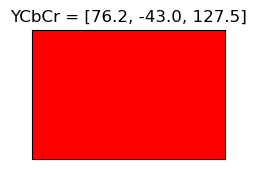

In [33]:

pure_red = rgb2ycc@np.array([[255],[0],[0]]) # SOLUTION

fig = show_ycbcr(pure_red.round(1))

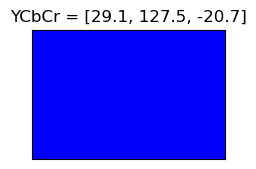

In [34]:
pure_blue = rgb2ycc@np.array([[0],[0],[255]]) # SOLUTION

fig = show_ycbcr(pure_blue.round(1))

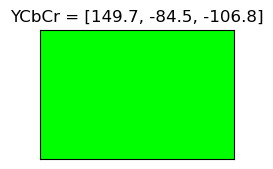

In [35]:
pure_green =  rgb2ycc@np.array([[0],[255],[0]])  # SOLUTION

fig = show_ycbcr(pure_green.round(1))



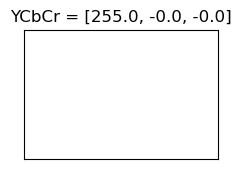

In [36]:
pure_white =  rgb2ycc@np.array([[255],[255],[255]])  # SOLUTION

fig = show_ycbcr(pure_white.round(1))


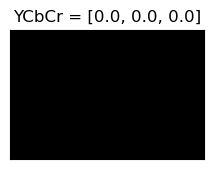

In [37]:
pure_black = rgb2ycc@np.array([[0],[0],[0]]) # SOLUTION

fig = show_ycbcr(pure_black.round(1))

In [38]:
# TEST

assert get_array_hash_normalized(pure_red.round(1)) == '5ee606204747a7cc0ae81bfc49cd324c'

In [39]:
# TEST

assert get_array_hash_normalized(pure_blue.round(1)) == '266c4198951281ed8eef5254f12d3361'

In [40]:
# TEST

assert get_array_hash_normalized(pure_green.round(1)) == 'ea1ce98087daf6112abffce2a0e1a6a5'

In [41]:
# TEST

assert get_array_hash_normalized(pure_white.round(1)) == 'cda2900f62d10f373a0a5303b2250da3'

In [42]:
# TEST

assert get_array_hash_normalized(pure_black.round(1)) == '17acb292c7986f3e21d1d2de0a9e7670'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 2e (3 pts) ###

Find the 
$\begin{bmatrix} R \\ G \\ B \end{bmatrix}
$ coordinates for the following colors and check visually that the two representations agree.  

 i). $\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}=\begin{bmatrix} 128 \\ 0 \\ 0 \end{bmatrix}$.

 ii).  $\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}=\begin{bmatrix} 128 \\ 60 \\ 0 \end{bmatrix}$.

 iii).  $\begin{bmatrix} Y \\ C_b \\ C_r \end{bmatrix}=\begin{bmatrix} 128 \\ 0 \\ 60 \end{bmatrix}$. 


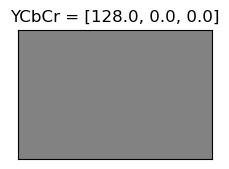

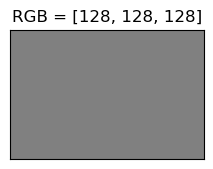

In [43]:

ycc_i = np.array([[128],[0],[0]])

rgb_i = P_B@ycc_i  # SOLUTION



fig = show_ycbcr(ycc_i)

fig = show_rgb(rgb_i)


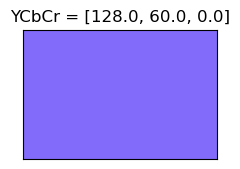

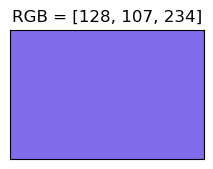

In [44]:
ycc_ii = np.array([[128],[60],[0]])

rgb_ii = P_B@ycc_ii  # SOLUTION



fig = show_ycbcr(ycc_ii)

fig = show_rgb(rgb_ii)


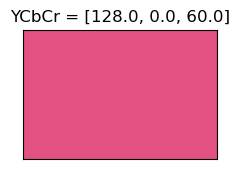

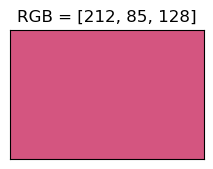

In [45]:
ycc_iii = np.array([[128],[0],[60]])

rgb_iii = P_B@ycc_iii  # SOLUTION



fig = show_ycbcr(ycc_iii)

fig = show_rgb(rgb_iii)


In [46]:
# TEST

assert get_array_hash_normalized(rgb_iii.round(1)) == 'ff7a59df5197980bc32548836526e9c2'

In [47]:
# TEST

assert get_array_hash_normalized(rgb_i.round(1)) == '955a98d374f2ee800de4cca2e0d3dd7c'

In [48]:
# TEST

assert get_array_hash_normalized(rgb_ii.round(1)) == '06cd2b42ebb7b648763ab90036900cf3'

In [49]:
# Run this cell to close the figures you ran above (so they don't take up too much memory)

plt.close(fig) 

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 2f (3 pts) ###

In the Markdown cell below, write expressions (using LaTeX) for:

i).  The luminance $Y$ as it depends on $R$,
  $G$, and $B$.

ii). The blue chrominance $C_b$ as it depends on $R$,
  $G$, and $B$.  
iii). The red chrominance $C_r$ as it depends on $R$,
  $G$, and $B$.

 Notice how these quantities can be roughly interpreted by stating that:

 - the luminance represents the brightness of the
  color.
 - the blue chrominance measures the amount of blue in
  the color.
 - the red chrominance measures the amount of red in
  the color. 


Complete these equations (i.e. write each of these variables as functions of $R$, $G$ and $B$), using LaTeX

i).  $Y = ...$

ii).  $C_b = ...$

iii).  $C_r = ...$

Answer in here

These two color models provide us with two ways to represent
    colors, each of which is useful in a certain context:  

Digital
    displays, such as those in phones and computer monitors, create
    colors by combining various amounts of red, green, and blue.
    The $RGB$ model is therefore most relevant in digital
    applications.


By contrast, the $YC_bC_r$ color model was created based on
    research into human vision and aims to concentrate the most visually
    important data into a single coordinate, the luminance, to which our
    eyes are most sensitive.  Of course, any basis of $\mathbb{R}^3$
    must have three vectors so we need two more coordinates, blue
    and red chrominance, if we want to represent all colors.

To see this explicitly, below is the original image and the image as
    rendered with only the luminance.  That is, on the right, the
    color of each pixel is represented by only one byte, which is the
    luminance. 

<img src="img/first.png">


This image essentially looks like a grayscale version
    of the original image with all its visual detail.  In fact, before
    digital television became the standard, television signals were
    broadcast using the $YC_bC_r$ color model.  When a signal was
    displayed on a black-and-white television, the luminance was
    displayed and the two chrominance values simply ignored.



For comparison, shown below
    are the corresponding images created using only the blue
    chrominance and the red chrominance.  Notice that the amount of
    visual detail is considerably less in these images.

<img src="img/second.png">



The aim of the JPEG compression algorithm is to represent an
    image using the smallest amount of data possible.  By converting
    from the $RGB$ color model to the $YC_bC_r$ color model,
    we are concentrating the most visually important data into
    the luminance values.  This is helpful because we can
    safely ignore some of the data in the chrominance values since
    that data is not as visually important.


# The JPEG compression algorithm
The key to representing the image using a smaller amount of
    data is to detect redundancies in the data.  To begin, we
    first break the image, which is composed of $1440\times 1468$
    pixels, into small $8\times8$ blocks of pixels.  

For example,
    we will consider the $8\times8$ block of pixels outlined in
    green in the original image, shown on the left in the figure below.  The image on the right zooms in on the
    block.

<img src="img/zoom.png">



Notice that this block, as seen in the original image, is very
    small.  If we were to change some of the colors in this block
    slightly, our eyes would probably not notice.

Here we see a close-up of the block. The important point here is that the colors do not change too much over this block. In fact, we expect this to be true for most of the blocks. There will, of course, be some blocks that contain dramatic changes, such as where the sky and rock intersect, but they will be the exception.

<img src="img/eightblock.png" width="250" height="250">






Following our earlier work, we will change the representation
    of colors from the $RGB$ color model to the $YC_bC_r$
    model.  This separates the colors into luminance and chrominance
    values that we will consider separately.
    In the figure below, we see the luminance
    values of this block.  Again, notice how these values do not vary
    significantly over the block.

<img src="img/lum_values.png" width="600" height="300">
        
The code below creates a matrix `luminance` with these values

In [50]:
luminance = np.array([
    [176, 170, 170, 169, 162, 160, 155, 150],
    [181, 179, 175, 167, 162, 160, 154, 149],
    [165, 170, 169, 161, 162, 161, 160, 158],
    [139, 150, 164, 166, 159, 160, 162, 163],
    [131, 137, 157, 165, 163, 163, 164, 164],
    [131, 132, 153, 161, 167, 167, 167, 169],
    [140, 142, 157, 166, 166, 166, 167, 169],
    [150, 152, 160, 168, 172, 170, 168, 168]
], dtype=float)

Our strategy in the compression algorithm is to perform a
    **change of basis** to take advantage of the fact that the luminance
    values do not change significantly over the block.  Rather than
    recording the luminance of each of the pixels, this change of basis
    will allow us to record the average luminance along with some
    information about how the individual colors vary from the average.




The JPEG compression algorithm uses a **_Discrete Cosine Fourier
    Transform_**, which is defined using the basis $\mathcal{B}$
    whose basis vectors are


$$\begin{aligned}
      \mathbf v_0 = \left[\begin{array}{c}
      \cos\left(\frac{(2\cdot0+1)\cdot0\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot1+1)\cdot0\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot2+1)\cdot0\pi}{16}\right) \\
      \vdots \\
      \cos\left(\frac{(2\cdot7+1)\cdot0\pi}{16}\right) \\
      \end{array}\right], &
      \mathbf v_1 = \left[\begin{array}{c}
      \cos\left(\frac{(2\cdot0+1)\cdot1\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot1+1)\cdot1\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot2+1)\cdot1\pi}{16}\right) \\
      \vdots \\
      \cos\left(\frac{(2\cdot7+1)\cdot1\pi}{16}\right) \\
      \end{array}\right], \\ \\
      \ldots,
      \mathbf v_6 = \left[\begin{array}{c}
      \cos\left(\frac{(2\cdot0+1)\cdot6\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot1+1)\cdot6\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot2+1)\cdot6\pi}{16}\right) \\
      \vdots \\
      \cos\left(\frac{(2\cdot7+1)\cdot6\pi}{16}\right) \\
      \end{array}\right], &
      \mathbf v_7 = \left[\begin{array}{c}
      \cos\left(\frac{(2\cdot0+1)\cdot7\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot1+1)\cdot7\pi}{16}\right) \\
      \cos\left(\frac{(2\cdot2+1)\cdot7\pi}{16}\right) \\
      \vdots \\
      \cos\left(\frac{(2\cdot7+1)\cdot7\pi}{16}\right) \\
      \end{array}\right]\text{.} \\
      \end{aligned}$$



The code below creates a matrix `P` whose columns are the basis vectors shown above. 

In [51]:
# --- Cosine matrix P (8x8) ---
# Matches: mat = [[cos((2*i+1)*j*pi/16) ...]]
i = np.arange(8)[:, None]              # shape (8,1)
j = np.arange(8)[None, :]              # shape (1,8)
P = np.cos((2*i + 1) * j * np.pi / 16) # shape (8,8)
P

array([[ 1.        ,  0.98078528,  0.92387953,  0.83146961,  0.70710678,
         0.55557023,  0.38268343,  0.19509032],
       [ 1.        ,  0.83146961,  0.38268343, -0.19509032, -0.70710678,
        -0.98078528, -0.92387953, -0.55557023],
       [ 1.        ,  0.55557023, -0.38268343, -0.98078528, -0.70710678,
         0.19509032,  0.92387953,  0.83146961],
       [ 1.        ,  0.19509032, -0.92387953, -0.55557023,  0.70710678,
         0.83146961, -0.38268343, -0.98078528],
       [ 1.        , -0.19509032, -0.92387953,  0.55557023,  0.70710678,
        -0.83146961, -0.38268343,  0.98078528],
       [ 1.        , -0.55557023, -0.38268343,  0.98078528, -0.70710678,
        -0.19509032,  0.92387953, -0.83146961],
       [ 1.        , -0.83146961,  0.38268343,  0.19509032, -0.70710678,
         0.98078528, -0.92387953,  0.55557023],
       [ 1.        , -0.98078528,  0.92387953, -0.83146961,  0.70710678,
        -0.55557023,  0.38268343, -0.19509032]])

On first glance, this probably looks intimidating, but we can
    make sense of it by looking at these vectors graphically.  

Wait - you're probably thinking "how are we going to visualize something in 8 dimensions?"        
        You're right, we can't plot these vectors as arrows like we're used to because they're in 8 dimensions!  However, we can plot each component of the vector on the y-axis, to get a sense of how much the components vary from one another.  
        
Shown below are four of these basis
    vectors.  

<img src="img/dct.png" width = 500>

Notice that 
 - $\mathbf v_0$ is constantly 1,
 - $\mathbf v_1$ varies relatively slowly, 
 - $\mathbf v_2$ varies a little more rapidly, and 
 - $\mathbf v_7$ varies quite rapidly.

The main thing to notice is that:  the basis vectors vary at
    different rates with the first vectors varying relatively slowly
    and the later vectors varying more rapidly.

You can play around here to visually see how these basis vectors change as you adjust their coefficients: 
 https://davidaustinm.github.io/javascript/fourier/fourier-separate.html

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3a (3 pts) ###

To start, we’ll consider the first column of luminance values, which is the 8-dimensional vector $\mathbf{x}$ represented graphically as:



<img src="img/x.png" width = 500>

Notice the following:
 - There are not rapid variations in these numbers within the column.
 - If some of the values were to change slightly, our eyes would probably not notice because the pixels, when represented on a screen, are so small.





Find the vector 


$$\mathbf{f} = \left\{\mathbf x\right\}_{\mathcal{B}} = \left[\begin{array}{c}
	F_0 \\ F_1 \\ F_2 \\ \vdots \\ F_7
	\end{array}\right]$$

where ${\mathcal{B}}$ is the basis for the Discrete Cosine Transform basis given above.

The coordinates $F_j$ are called the **Fourier
      coefficients** of the vector $\mathbf x$.



In [52]:
x =  luminance[:, [0]] 

f = np.linalg.inv(P)@x  # SOLUTION

print(f)

[[151.625     ]
 [ 20.01019547]
 [ 15.32608491]
 [ -6.04293867]
 [ -3.7123106 ]
 [ -3.12063565]
 [ -0.41667903]
 [  0.67941335]]


In [53]:
# TEST

assert get_array_hash_normalized(f.round(4)) == 'c3abfbd7a7360b8f87621a7b3934b937'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3b (3 pts) ###

i).  What does the relative size of the Fourier coefficients tell us about the relative contributions of the basis vectors $\mathbf{v_0, v_1, ... v_7}$ to the vector $\mathbf{x}$?

ii).  How is your observation in part(i) consistent with the fact that "there are not rapid variations" in the vector $\mathbf{x}$?

Answer both questions in the Markdown cell below.



Answer here

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3c (3 pts) ###

i).  Form a new vector $\mathbf{f_{approx}}$ which is formed from $\mathbf{f}$ by rounding the Fourier coefficients to the nearest integer and setting $F_6$ and $F_7$ to zero.  In other words, we are only saving $6$ of the $8$ Fourier coefficients or $75\%$ of them.

Hint:  NumPy arrays have a method `round` (https://numpy.org/doc/2.3/reference/generated/numpy.round.html) 


ii).  Then find $\mathbf{x_{approx}}$, an approximation to the vector $\mathbf{x}$ formed by the approximate Fourier coefficients $\mathbf{f_{approx}}$.


iii).  Finally calculate $\mathbf{x} - \mathbf{x_{approx}}$, which measures the error in your approximation.





In [54]:
# Replace the ... below with any code you need to calculate the vectors:

# BEGIN SOLUTION

f_approx = f.round(0)
f_approx[6] = 0
f_approx[7] = 0

# END SOLUTION

f_approx = f_approx # SOLUTION


x_approx =  P@f_approx # SOLUTION


error = x - x_approx # SOLUTION


print ("x:", x)

print("x_approx:", x_approx.round(2))

print("error", error)



x: [[176.]
 [181.]
 [165.]
 [139.]
 [131.]
 [131.]
 [140.]
 [150.]]
x_approx: [[175.99]
 [181.31]
 [165.5 ]
 [140.05]
 [130.57]
 [132.68]
 [139.83]
 [150.07]]
error [[ 0.0100569 ]
 [-0.31096863]
 [-0.49902102]
 [-1.05419889]
 [ 0.42743911]
 [-1.67733026]
 [ 0.17361141]
 [-0.06958863]]


In [55]:
# TEST

assert get_array_hash_normalized(f_approx) == '854b59b4f735022a65498b04012061cf'

In [56]:
# TEST

assert get_array_hash_normalized(x_approx.round(7))  == 'de0e181d5bed0704349f0df68ff761de'

In [57]:
# TEST

assert get_array_hash_normalized(error.round(7)) == '714e8dfe10433f8dbc34250be1421912'

Here’s the central idea:  we have saved only $75\%$ of the Fourier coefficients but when we reconstruct the visual information in the vector $\mathbf{x}$, the error is pretty small and probably not visible to the human eye (remember that the components of $\mathbf{x}$ can vary between 0 and 255).  We say that the **compression ratio** is $75\%$.


In fact, when a JPEG file is created, there is a “quality” parameter that can be set. When the quality parameter is high, we will store many of the Fourier coefficients; when it is low, we will ignore more of them.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3d (6 pts) ###


Let’s try again saving only the four largest Fourier coefficients (a compression ratio of $50\%$);  that is, 

i). Form a new $\mathbf{f_{approx50}}$ from $\mathbf{f}$ by rounding the Fourier coefficients to the nearest integer and setting the **four** Fourier coefficients with the smallest magnitudes to zero.  

ii).  Then find $\mathbf{x_{approx50}}$, an approximation to the vector $\mathbf{x}$ formed by the approximate Fourier coefficients $\mathbf{f_{approx50}}$.


iii).  Finally calculate $\mathbf{x} - \mathbf{x_{approx50}}$, which measures the error in your approximation.





In [58]:
# Replace the ... below with any code you need to calculate the vectors:

# BEGIN SOLUTION

f_approx50 = f.round(0)
f_approx50[4] = 0
f_approx50[5] = 0
f_approx50[6] = 0
f_approx50[7] = 0

# END SOLUTION

f_approx50 = f_approx50 # SOLUTION


x_approx50 =  P@f_approx50 # SOLUTION


error50 = x - x_approx50 # SOLUTION


print ("x:", x)

print("x_approx50:", x_approx50.round(2))

print("error50", error50)



x: [[176.]
 [181.]
 [165.]
 [139.]
 [131.]
 [131.]
 [140.]
 [150.]]
x_approx50: [[180.49]
 [175.54]
 [163.26]
 [145.38]
 [130.91]
 [129.26]
 [139.94]
 [151.23]]
error50 [[-4.48508092]
 [ 5.45981434]
 [ 1.74413514]
 [-6.37703485]
 [ 0.09342083]
 [ 1.73636783]
 [ 0.05968269]
 [-1.23130505]]


In [59]:
# TEST

assert get_array_hash_normalized(f_approx50) == '38bc71eb35de6feacf0593289922b578'

In [60]:
assert get_array_hash_normalized(x_approx50.round(7)) == 'a8a98990103054b76929a408713ce8a8'  

In [61]:
assert get_array_hash_normalized(error50.round(7)) == 'eb05727491f2d02c92a5ea2256ce4382' 

Notice the tradeoff: we are only saving $50\%$ of the Fourier coefficients, but the error in the reconstructed vector $\mathbf{x}$ is bigger.  
 


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3e (3 pts) ###


We can in fact do better.  Let’s return to the 8 × 8 matrix of luminance values. Each column of luminance values forms an 8-dimensional vector, the first of which we studied in the last 4 parts of this problem.  

If $\mathbf{x_i}$ is the $ith$ column of the luminance matrix, then we can find its corresponding vector $\mathbf{f_i}$ of Fourier coefficients.  

Find the $8\times 8$ Fourier coefficient matrix whose columns are the vectors $\mathbf{f_0, f_1, ...f_7}$







In [62]:
f_matrix = np.linalg.inv(P)@luminance

print(f_matrix)

[[ 1.51625000e+02  1.54000000e+02  1.63125000e+02  1.65375000e+02
   1.64125000e+02  1.63375000e+02  1.62125000e+02  1.61250000e+02]
 [ 2.00101955e+01  1.80165884e+01  8.75726545e+00  5.01836304e-01
  -4.17298593e+00 -4.67884071e+00 -6.95962147e+00 -1.01474725e+01]
 [ 1.53260849e+01  9.90169221e+00  3.03543753e+00  2.43819874e+00
   2.67596774e+00  1.42544747e+00 -1.26693480e+00 -2.93976667e+00]
 [-6.04293867e+00 -9.18603564e+00 -3.69462145e+00  2.02022643e-02
  -1.02031875e-01  1.01817048e-01 -7.40733362e-02  6.98904341e-02]
 [-3.71231060e+00 -2.47487373e+00 -5.30330086e-01  2.29809704e+00
  -1.76776695e-01 -1.76776695e-01  1.76776695e-01 -1.11022302e-15]
 [-3.12063565e+00 -2.01656350e+00 -7.89175070e-01  1.01563641e-01
  -1.48347282e+00 -8.33985354e-01  6.24806034e-01  1.65949456e+00]
 [-4.16679025e-01 -1.03994775e+00 -1.44866111e+00 -1.96664357e+00
   1.37902018e+00  1.13163577e+00  1.09880672e+00  1.21769123e+00]
 [ 6.79413348e-01  4.50290949e-01 -4.02836035e-01 -3.35316298e-01
   

In [63]:
# TEST
assert get_array_hash_normalized(f_matrix.round(7))  == 'a16912aa8f7b21466d1ff0eb5950e354'

As you scan across a row, take the first row, for instance, you’ll see that the values don’t change wildly.  So maybe we can further compress our data by taking the Fourier transform _of the rows of the matrix_ of Fourier coefficients.

In [64]:
f_matrix[0]

array([151.625, 154.   , 163.125, 165.375, 164.125, 163.375, 162.125,
       161.25 ])

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3f (3 pts) ###


i). Define the vector $\mathbf{y}$ consisting of the elements of the first row of the Fourier coefficient matrix (from part e).    While this represents the first row, for your answer here define this as a column vector in NumPy.  (Tip - see the beginning of this lab for how to use the Transpose function in NumPy)

ii). Then find the vector of Fourier coefficients $\{{\mathbf{y}}\}_{\mathcal{B}}$. Again, write this as a column vector in NumPy.  



In [65]:
y = np.array([f_matrix[0]]).T # SOLUTION

y_B = np.linalg.inv(P)@y  # SOLUTION

print(y.round(0))

print(y_B.round(0))


[[152.]
 [154.]
 [163.]
 [165.]
 [164.]
 [163.]
 [162.]
 [161.]]
[[161.]
 [ -4.]
 [ -5.]
 [ -2.]
 [ -0.]
 [  1.]
 [  1.]
 [  0.]]


In [66]:
# TEST
assert get_array_hash_normalized(y) == '4671d1e43a38b31416a9621c69109292'

In [67]:
# TEST
assert get_array_hash_normalized(y_B.round(7))  == '3b5a445d8bd5e93605dfdb72fb5db1d7'

Notice the relative size of these Fourier coefficients.  Many of them are small, meaning we likely don't need to keep this information.  


This suggests that we can also Fourier transform each of the rows of the Fourier coefficient matrix.  



This is called the **double Fourier transform**  and there’s a function 
`double_fourier` defined here
that does this for any matrix A using the Discrete Fourier Transform Basis defined in the matrix P.


In [68]:
def double_fourier(A, P):
    """  
    Applies a Discrete Cosine Fourier transform to both the columns and rows of A
    Returns the matrix of Fourier coefficients.
    """
    P_inv = np.linalg.inv(P)
    A = np.asarray(A, dtype=float)
    return P_inv @ A @ P_inv.T

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3g (1 pts) ###

Use the `double_fourier` function above to apply a Discrete Cosine Fourier transform to both the columns and rows of the luminance matrix. This function returns the matrix of Fourier coefficients.  

As a check, notice that the first row of this resulting matrix is the vector $\{{\mathbf{y}}\}_{\mathcal{B}}$  
you found in the previous part.  


In [77]:
double_f = double_fourier(luminance, P) # SOLUTION



print("first row of double_f", double_f[0,:])

print("y_B from previous part",y_B.T)


first row of double_f [ 1.60625000e+02 -4.02269464e+00 -4.83245946e+00 -1.71676316e+00
 -4.41941738e-02  9.03020336e-01  8.05784522e-01  3.00603698e-01]
y_B from previous part [[ 1.60625000e+02 -4.02269464e+00 -4.83245946e+00 -1.71676316e+00
  -4.41941738e-02  9.03020336e-01  8.05784522e-01  3.00603698e-01]]


In [75]:
# TEST
assert get_array_hash_normalized(double_f.round(6)) == '7c091f823bb6db8a697f0798e00c639a'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3h (3 pts) ###

Create a function `round_matrix( matrix_name, minimum )` that will round the entries in the given matrix to the nearest integer and set any entries whose absolute value is smaller than minimum to zero.  For instance, 
round_matrix( A, 4 ) will round the entries of A and set any entries in the range from -3 to 3 equal to zero. 
Your function should **not** contain any for-loops

Then use the function to round the matrix of double Fourier coefficients with a minimum value of 4 and save the result to the variable `double_f_simplified`



In [93]:
def round_matrix(A, scale):
    """
    Round entries to nearest integer, then zero out small values
    whose absolute value is < scale. Returns an (8,8) integer value numpy array.
    """
    # BEGIN SOLUTION
    B = np.rint(A).astype(int)
    B[np.abs(B) < scale] = 0

    # END SOLUTION
    
    return B

double_f_simplified = round_matrix(double_f, 4) # SOLUTION

print(double_f_simplified)

[[161  -4  -5   0   0   0   0   0]
 [  0  15   4   0   0   0   0   0]
 [  4   7   0   0   0   0   0   0]
 [  0  -4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [91]:
# TEST
a = round_matrix(np.array([[1.1, 2.7, 4.9],[120.3, 14.7, 18.9], [-4.8, -7.9, 10.2]]),3)
assert get_array_hash_normalized(a) == '516ae9651962a17521458cbff6e1b2ab'

In [81]:
assert get_array_hash_normalized(double_f_simplified) == '77ca4411bd47fea5e2af97a82bdc2880'

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3i (2 pts) ###

Notice we only need to keep the nonzero double Fourier coefficients from the previous part.

Calculate the new compression ratio, which is given by the ratio of non-zero double Fourier coefficients out of the original $64$.   (Hint: NumPy has a `count_nonzero` method)



In [97]:
compression_ratio = np.count_nonzero(double_f_simplified)/64 # SOLUTION

compression_ratio

0.125

In [96]:
# TEST
assert get_hash(compression_ratio) == '8eb69fe48ceeb8bb7d08789dabd30eff'

The function below reconstructs the luminance values from the rounded double Fourier coefficients (in this function the rounded double Fourier coefficients should be input as the matrix A).  



In [100]:
def inverse_double_fourier(A, P, decimals=3):
    """
    Returns np.round(P @ A @ P.T, decimals).
    """
    A = np.asarray(A, dtype=float)
    return np.round(P @ A @ P.T, decimals)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

### 🔴 Question 3j (3 pts) ###

i).  Use the `inverse_double_fourier` function to reconstruct the luminance values from the rounded double Fourier coefficients.   Save your answer in the variable `luminance_reconstruct`.

ii). Finally, subtract the luminace_reconstruct matrix from the original luminance matrix to get an error matrix that measures the error in your approximation.



In [104]:
luminance_reconstruct =  inverse_double_fourier(double_f_simplified, P, decimals=3) # SOLUTION

error_matrix = luminance - luminance_reconstruct # SOLUTION

print(error_matrix)

[[-1.288 -5.802 -2.804  0.607 -0.988  2.589  2.235 -0.114]
 [ 8.314  7.19   5.2    0.595  0.25   3.457  2.03  -0.282]
 [ 2.626  6.956  5.369 -2.124  1.053  3.567  6.232  6.568]
 [-9.19  -1.268  8.036  5.835 -3.241 -1.874  1.888  4.378]
 [-5.648 -5.108  6.159  5.402 -2.691 -5.192 -4.076 -3.28 ]
 [-3.225 -8.961  1.287 -1.448 -2.836 -5.753 -5.45  -2.368]
 [-0.545 -5.227 -0.62  -1.38  -7.066 -7.814 -4.462 -0.132]
 [ 2.296 -1.865 -3.155 -3.199 -2.679 -3.065 -0.696  2.801]]


In [96]:
# TEST
assert get_hash(compression_ratio) == '8eb69fe48ceeb8bb7d08789dabd30eff'

Notice that we have only saved a small percentage of the Fourier coefficients yet we are able to reconstruct the luminance values with a relatively small error.  When you take a picture with your phone, the software saves the rounded double Fourier coefficients of each 8x8 block of pixels, which represents only a small fraction of the information.  When you want to view a picture, the software reconstructs the image from the saved double Fourier coefficients with a relatively small error.  Most photo editing programs allow you to choose the compression ratio, which is controlled by the range of Fourier coefficients we save.


<img src="img/quality.png" width="600" height="300">

Physiologists have found that the human eye is more sensitive to the luminance values than the chrominance values.  This means that we’re able to throw away more of the Fourier coefficients from the chrominance values to achieve an even greater savings.

Similar ideas are involved in storing movies and digital music.  Next time you’re streaming a show, you will enjoy it even more when you realize that lots of Fourier coefficients are being streamed to your device.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


### Submission Instructions

Before proceeding any further, **save this notebook.**

Then run the cell below to double check that you don't have any spaces between dollar signs and text when writing LaTeX:

In [ ]:
# Run this cell before you run the 'grader.export()' cell below.  
# It will search for LaTeX errors that will cause the LaTeX compiler to fail.  

import simple_latex_checker as slc

nb = slc.Nb_checker()
nb.run_check("lab03.ipynb")

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 


* **Lab 3 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the Lab 3 Autograded assignment in Gradescope.

* **Lab 3 Manually Graded**: Submit your lab03.PDF to the Lab 3 Manually Graded assignment in Gradescope.  **It is your responsibility to fully review your PDF file before submitting and make sure that all your lines of code are visible and any LaTeX has correctly compiled and is fully viewable.**  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.** If not, you will lose points.    

[TROUBLESHOOTING TIPS](https://docs.google.com/document/d/1ndr3Wj1PSF5qzlLMaBJznwh6QGeEXjd5TAJ6nf9EJvo/edit?usp=sharing)  If you are having any issues compiling your assignment, please read through these troubleshooting tips first, then post any questions on Piazza.  

**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.